### Script de preparação de dados do Trabalho de Conclusão
#### Curso de Especialização Lato Sensu em Ciência de Dados e Big Data
#### Instituição Pontifícia Universidade Católica de Minas Gerais
##### Título do trabalho: 'ANÁLISE DE SÉRIES TEMPORAIS PARA PREDIÇÃO DO PREÇO DE AÇÚCAR E ETANOL'
Autor: Rafael Vasconcelos Valadares <br>
Data: 04/05/2024 <br>
Email: rafaelvvaladares@hotmail.com <br>
Etapa: 3- Análise exploratória dos dados (EDA)

In [1]:
# Definindo o diretório de trabalho

import os

# Obtendo o diretório de trabalho atual
diretorio_atual=os.getcwd()

# Mudando o diretório de trabalho
novo_diretorio= 'C:/Users/rafae/OneDrive/Área de Trabalho/Github_projetos/TCC/TCC_CANA/Dados_prontos'
os.chdir(novo_diretorio)

In [2]:
#Listando arquivos presentes no diretório atual

arquivos=os.listdir(novo_diretorio)

# Imprimindo os nomes dos arquivos

for arquivo in arquivos:
    print(arquivo)

dataset_atualizada.xlsx
decomposição_serie_acucar_plot.png
decomposição_serie_etanol_plot.png
df_sem_outliers.xlsx
eda_geral.xlsx
eda_preços.png
serie_etanol_açúcar_plot.png


In [3]:
# Importando o dataset preparado na etapa anterior
import pandas as pd

dados=pd.read_excel('df_sem_outliers.xlsx')
dados.head()

,data,safra,ano,mes,dia,preco_etanol_real,preco_etanol_dolar,preco_acucar_real,preco_acucar_dolar,ano_colheita,...,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,etanol_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,2012-01-03,2012/13,2012,1,3,1231.5,672.95,63.21,34.54,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
1,2012-01-04,2012/13,2012,1,4,1239.5,677.69,63.38,34.65,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
2,2012-01-05,2012/13,2012,1,5,1248.5,679.27,62.96,34.25,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
3,2012-01-06,2012/13,2012,1,6,1259.0,679.07,62.90,33.93,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
4,2012-01-09,2012/13,2012,1,9,1265.0,688.25,62.28,33.89,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804


In [4]:
# Observação dos tipos de dados
dados.dtypes

data                  datetime64[ns]
safra                         object
ano                            int64
mes                            int64
dia                            int64
                           ...      
etanol_preco_medio           float64
gnv_preco_medio              float64
PPI                            int64
pandemia                       int64
perc_eta_gas                 float64
Length: 88, dtype: object

In [5]:
# Lista de atributos do dataset
variaveis = dados.columns

In [6]:
variaveis

Index(['data', 'safra', 'ano', 'mes', 'dia', 'preco_etanol_real',
       'preco_etanol_dolar', 'preco_acucar_real', 'preco_acucar_dolar',
       'ano_colheita', 'area_brasil', 'area_centro-oeste', 'area_centro-sul',
       'area_nordeste', 'area_norte', 'area_norte/nordeste', 'area_sudeste',
       'produtividade_brasil', 'produtividade_centro-oeste',
       'produtividade_centro-sul', 'produtividade_nordeste',
       'produtividade_norte', 'produtividade_norte/nordeste',
       'produtividade_sudeste', 'producao_brasil', 'producao_centro-oeste',
       'producao_centro-sul', 'producao_nordeste', 'producao_norte',
       'producao_norte/nordeste', 'producao_sudeste', 'acucar_brasil',
       'acucar_centro-oeste', 'acucar_centro-sul', 'acucar_nordeste',
       'acucar_norte', 'acucar_norte/nordeste', 'acucar_sudeste',
       'etanol_total_brasil', 'etanol_total_centro-oeste',
       'etanol_total_centro-sul', 'etanol_total_nordeste',
       'etanol_total_norte', 'etanol_total_norte/nord

In [7]:
# Análise descritiva dos dados
df_eda=dados.describe().round(2).transpose()
df_eda['cv'] = (df_eda['std']*100/df_eda['mean']).round(2)
display(df_eda)

,count,mean,std,min,25%,50%,75%,max,cv
ano,2521.0,2016.94,3.10,2012.00,2014.00,2017.00,2020.00,2022.00,0.15
mes,2521.0,6.53,3.43,1.00,4.00,7.00,10.00,12.00,52.53
dia,2521.0,15.77,8.74,1.00,8.00,16.00,23.00,31.00,55.42
preco_etanol_real,2521.0,1744.02,651.71,1013.50,1218.50,1596.50,1916.00,3959.50,37.37
preco_etanol_dolar,2521.0,492.41,92.65,238.49,433.88,493.89,556.15,736.07,18.82
...,...,...,...,...,...,...,...,...,...
etanol_preco_medio,2521.0,2.79,0.82,1.89,2.07,2.72,2.99,5.37,29.39
gnv_preco_medio,2521.0,2.66,0.91,1.63,1.91,2.33,3.16,5.30,34.21
PPI,2521.0,0.57,0.50,0.00,0.00,1.00,1.00,1.00,87.72
pandemia,2521.0,0.24,0.43,0.00,0.00,0.00,0.00,1.00,179.17


In [8]:
df_eda.to_excel('eda_geral.xlsx', index=True)

C:\Users\rafae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rafae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


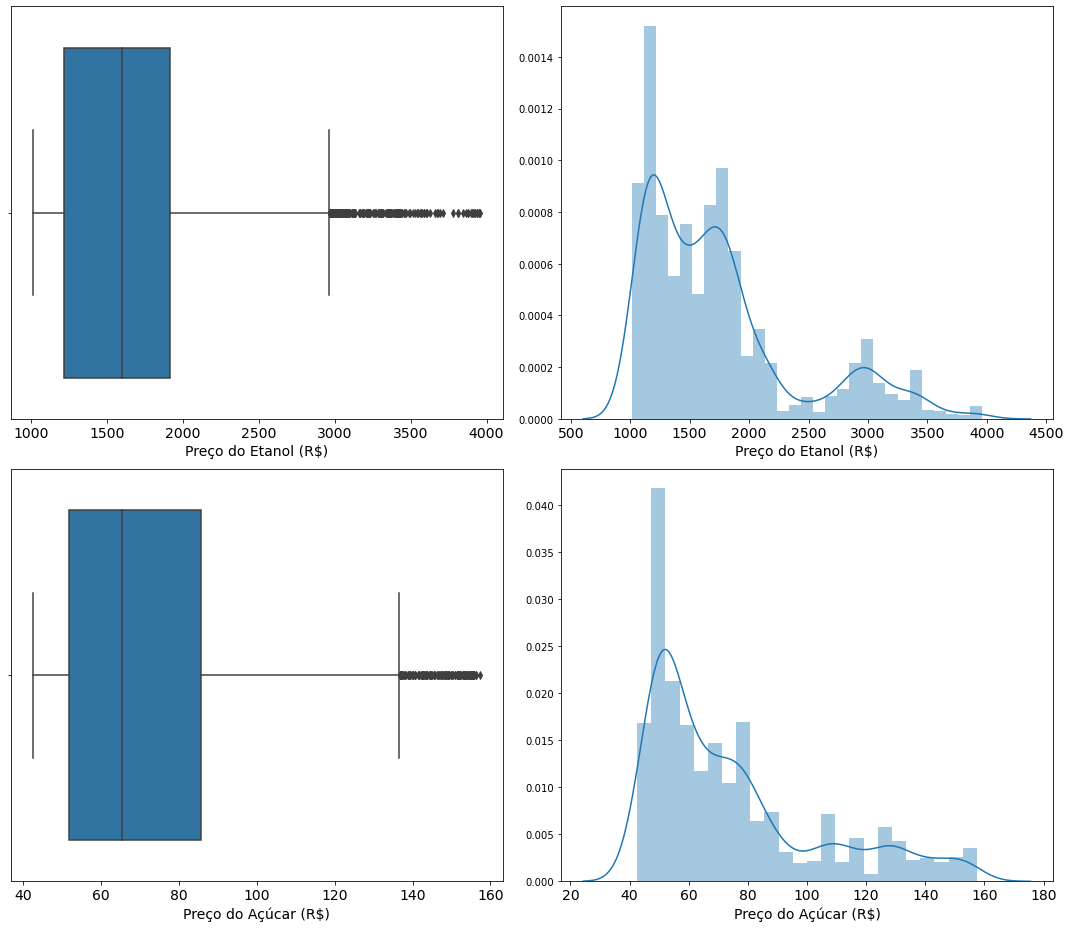

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize =(15,13))
sns.boxplot(x=dados['preco_etanol_real'], ax = ax[0,0])
ax[0,0].set_xlabel('Preço do Etanol (R$)', fontsize=14)
ax[0, 0].tick_params(axis='x', labelsize=14)
ax[0,0].set_ylabel('')

sns.distplot(x=dados['preco_etanol_real'], ax = ax[0,1])
ax[0,1].set_xlabel('Preço do Etanol (R$)', fontsize=14)
ax[0, 1].tick_params(axis='x', labelsize=14)
ax[0,1].set_ylabel('')

sns.boxplot(x=dados['preco_acucar_real'], ax = ax[1,0])
ax[1,0].set_xlabel('Preço do Açúcar (R$)', fontsize=14)
ax[1, 0].tick_params(axis='x', labelsize=14)
ax[1,0].set_ylabel('')


sns.distplot(x=dados['preco_acucar_real'], ax = ax[1,1])
ax[1,1].set_xlabel('Preço do Açúcar (R$)', fontsize=14)
ax[1, 1].tick_params(axis='x', labelsize=14)
ax[1,1].set_ylabel('')

plt.tight_layout()

plt.savefig('eda_preços.png', dpi = 300)

plt.show()

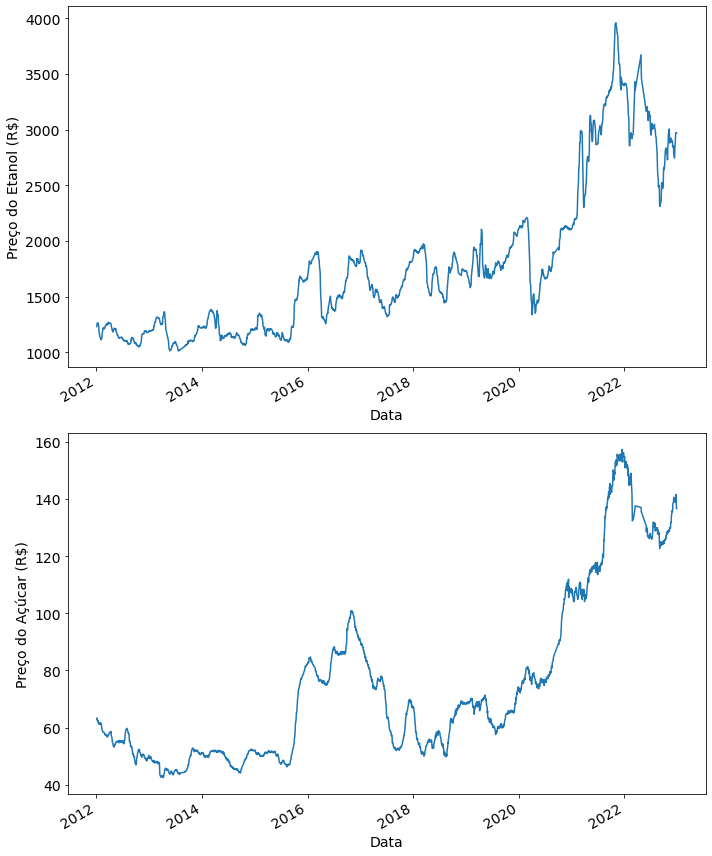

In [10]:
# Observação da série temporal

# Etanol
serie_etanol = pd.DataFrame(dados['preco_etanol_real'])
serie_etanol.index = pd.to_datetime(dados['data'])

# Açúcar
serie_acucar = pd.DataFrame(dados['preco_acucar_real'])
serie_acucar.index = pd.to_datetime(dados['data'])

# Matriz de gráficos
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Gráfico para o etanol
serie_etanol.plot(ax=ax[0], legend=False)
ax[0].set_xlabel('Data', fontsize=14)
ax[0].set_ylabel('Preço do Etanol (R$)', fontsize=14)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

# Gráfico para o açúcar
serie_acucar.plot(ax=ax[1], legend=False)
ax[1].set_xlabel('Data', fontsize=14)
ax[1].set_ylabel('Preço do Açúcar (R$)', fontsize=14)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

# You can continue plotting other subplots in a similar manner

plt.tight_layout()
plt.savefig('serie_etanol_açúcar_plot.png', dpi=300)  # Save the plot as an image
plt.show()

In [11]:
# Decomposição da série
from statsmodels.tsa.seasonal import seasonal_decompose
display(serie_etanol)

,preco_etanol_real
data,
2012-01-03,1231.5
2012-01-04,1239.5
2012-01-05,1248.5
2012-01-06,1259.0
2012-01-09,1265.0
...,...
2022-12-21,2968.0
2022-12-22,2969.5
2022-12-23,2971.5


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition for ethanol
resultado_etanol = seasonal_decompose(serie_etanol, model='multiplicative', period=45)


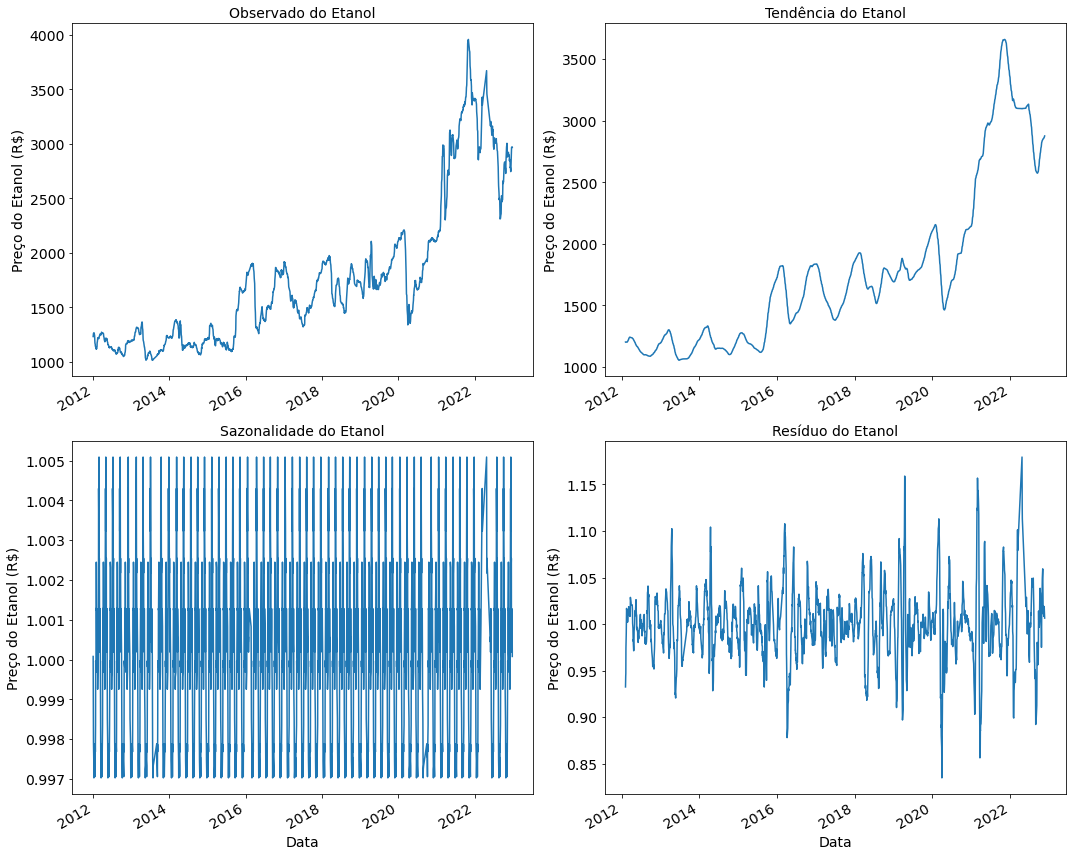

In [51]:
# Gráficos

# Create subplots side by side
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot decomposition components for ethanol
resultado_etanol.observed.plot(ax=ax[0, 0])
ax[0,0].set_title('Observado do Etanol', fontsize=14)
ax[0, 0].tick_params(labelsize=14)
ax[0,0].set_xlabel('', fontsize=14)
ax[0,0].set_ylabel('Preço do Etanol (R$)', fontsize=14)

resultado_etanol.trend.plot(ax=ax[0, 1])
ax[0, 1].set_title('Tendência do Etanol', fontsize=14)
ax[0, 1].tick_params(labelsize=14)
ax[0, 1].set_xlabel('', fontsize=14)
ax[0, 1].set_ylabel('Preço do Etanol (R$)', fontsize=14)

resultado_etanol.seasonal.plot(ax=ax[1, 0])
ax[1, 0].set_title('Sazonalidade do Etanol', fontsize=14)
ax[1, 0].tick_params(labelsize=14)
ax[1, 0].set_xlabel('Data', fontsize=14)
ax[1, 0].set_ylabel('Preço do Etanol (R$)', fontsize=14)

resultado_etanol.resid.plot(ax=ax[1, 1])
ax[1, 1].set_title('Resíduo do Etanol', fontsize=14)
ax[1, 1].tick_params(labelsize=14)
ax[1, 1].set_xlabel('Data', fontsize=14)
ax[1, 1].set_ylabel('Preço do Etanol (R$)', fontsize=14)

plt.savefig('decomposição_serie_etanol_plot.png', dpi=300) 

plt.tight_layout()
plt.show()

In [54]:
# Decomposição etanol
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition for sugar
resultado_acucar = seasonal_decompose(serie_acucar, model='multiplicative', period=45)


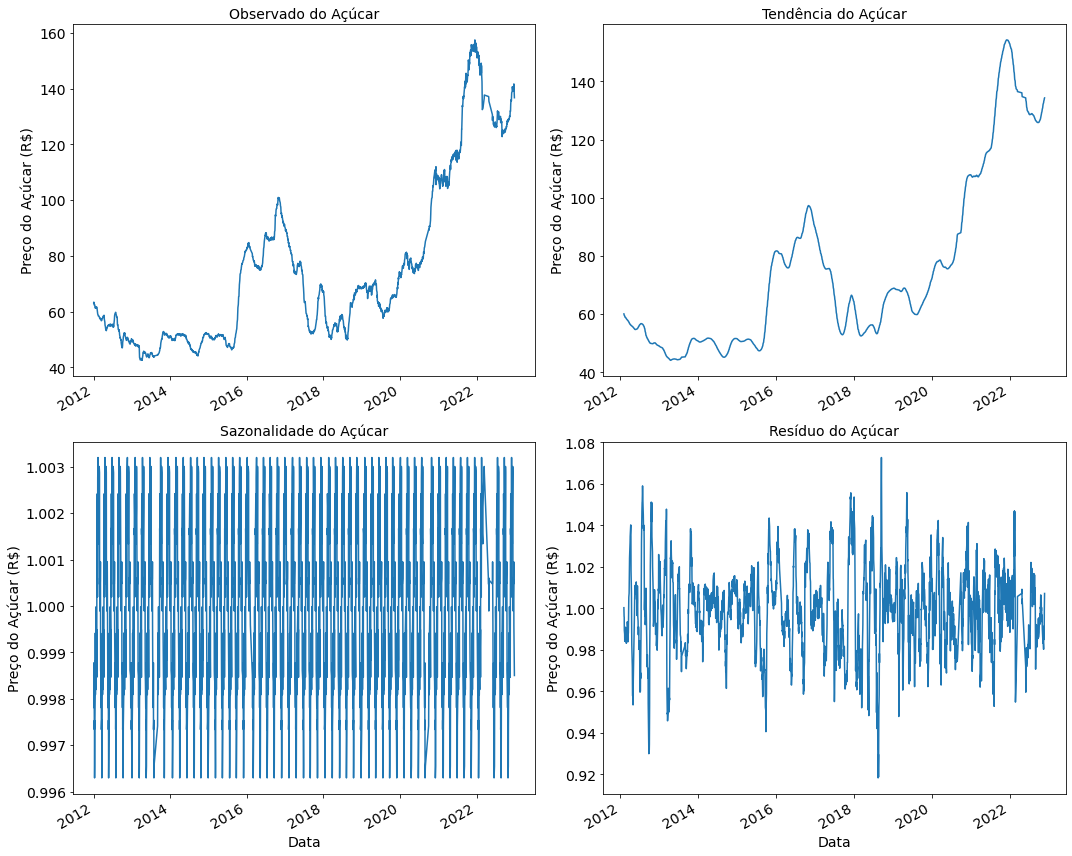

In [55]:
# Gráficos

# Create subplots side by side
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot decomposition components for ethanol
resultado_acucar.observed.plot(ax=ax[0, 0])
ax[0,0].set_title('Observado do Açúcar', fontsize=14)
ax[0, 0].tick_params(labelsize=14)
ax[0,0].set_xlabel('', fontsize=14)
ax[0,0].set_ylabel('Preço do Açúcar (R$)', fontsize=14)

resultado_acucar.trend.plot(ax=ax[0, 1])
ax[0, 1].set_title('Tendência do Açúcar', fontsize=14)
ax[0, 1].tick_params(labelsize=14)
ax[0, 1].set_xlabel('', fontsize=14)
ax[0, 1].set_ylabel('Preço do Açúcar (R$)', fontsize=14)

resultado_acucar.seasonal.plot(ax=ax[1, 0])
ax[1, 0].set_title('Sazonalidade do Açúcar', fontsize=14)
ax[1, 0].tick_params(labelsize=14)
ax[1, 0].set_xlabel('Data', fontsize=14)
ax[1, 0].set_ylabel('Preço do Açúcar (R$)', fontsize=14)

resultado_acucar.resid.plot(ax=ax[1, 1])
ax[1, 1].set_title('Resíduo do Açúcar', fontsize=14)
ax[1, 1].tick_params(labelsize=14)
ax[1, 1].set_xlabel('Data', fontsize=14)
ax[1, 1].set_ylabel('Preço do Açúcar (R$)', fontsize=14)

plt.savefig('decomposição_serie_acucar_plot.png', dpi=300) 

plt.tight_layout()
plt.show()

In [16]:
dados.columns

Index(['data', 'safra', 'ano', 'mes', 'dia', 'preco_etanol_real',
       'preco_etanol_dolar', 'preco_acucar_real', 'preco_acucar_dolar',
       'ano_colheita', 'area_brasil', 'area_centro-oeste', 'area_centro-sul',
       'area_nordeste', 'area_norte', 'area_norte/nordeste', 'area_sudeste',
       'produtividade_brasil', 'produtividade_centro-oeste',
       'produtividade_centro-sul', 'produtividade_nordeste',
       'produtividade_norte', 'produtividade_norte/nordeste',
       'produtividade_sudeste', 'producao_brasil', 'producao_centro-oeste',
       'producao_centro-sul', 'producao_nordeste', 'producao_norte',
       'producao_norte/nordeste', 'producao_sudeste', 'acucar_brasil',
       'acucar_centro-oeste', 'acucar_centro-sul', 'acucar_nordeste',
       'acucar_norte', 'acucar_norte/nordeste', 'acucar_sudeste',
       'etanol_total_brasil', 'etanol_total_centro-oeste',
       'etanol_total_centro-sul', 'etanol_total_nordeste',
       'etanol_total_norte', 'etanol_total_norte/nord

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Removendo colunas não numéricas

dados_numericos = dados.drop(columns = ['data', 'safra', 'ano', 'mes', 'dia'])

# Calculando a matriz de correlação

corr = dados_numericos.corr()


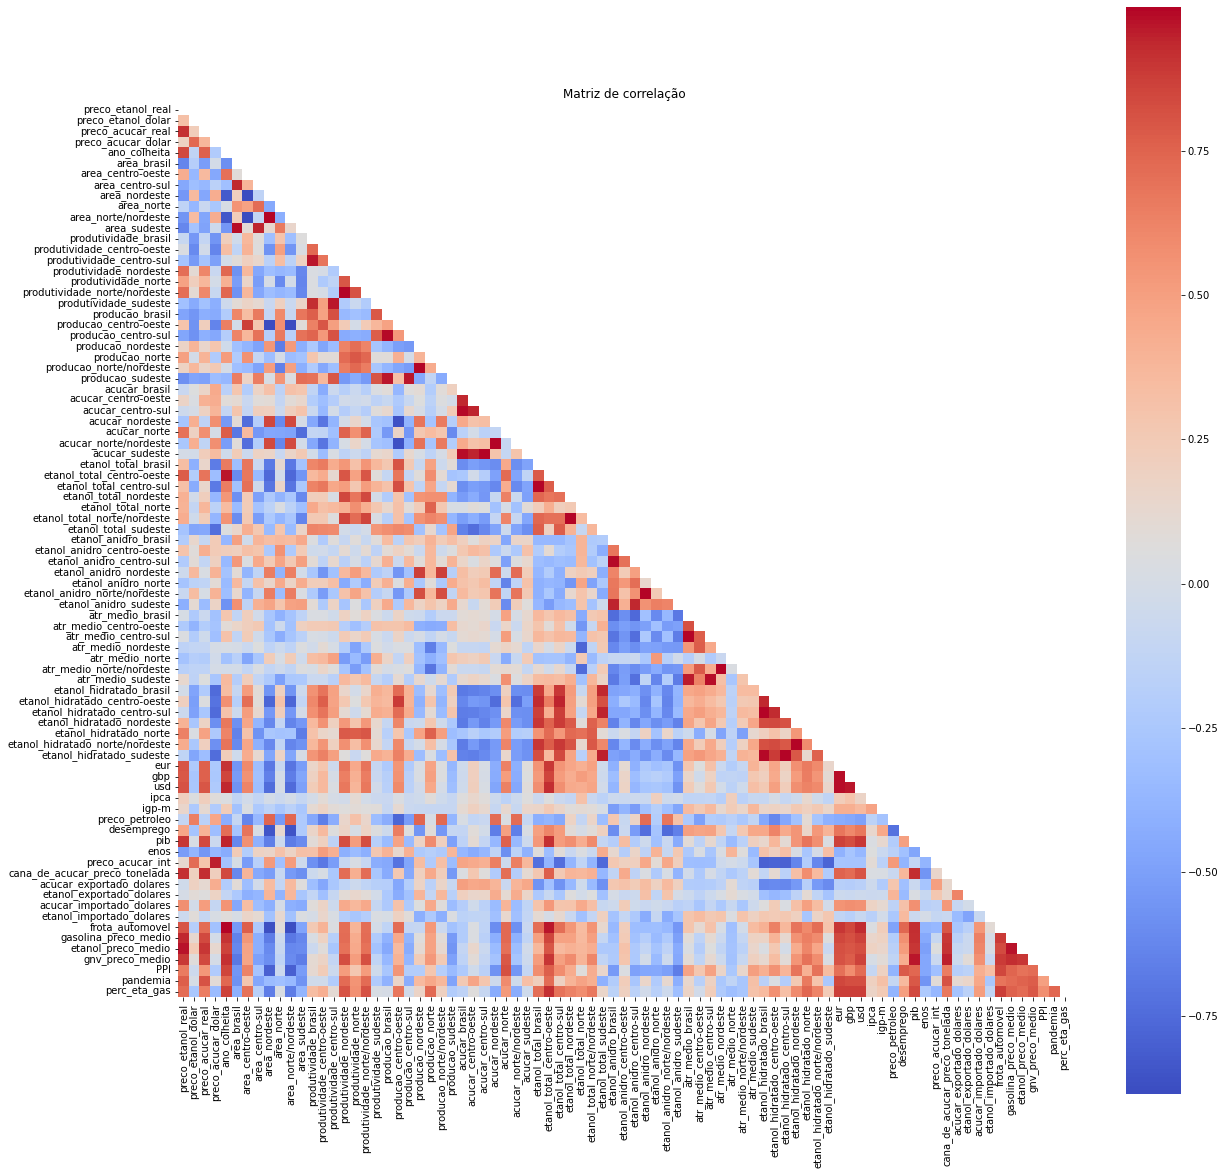

In [18]:
# Generate a mask for the upper triangle
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (20,20))
sns.heatmap(corr,mask=mask, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matriz de correlação')
plt.show()

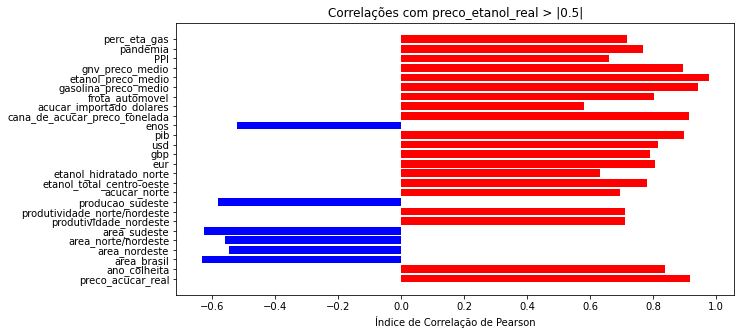

In [58]:
# Filtrando correlações para preco_etanol_real
corr_etanol = corr['preco_etanol_real'][(corr['preco_etanol_real'].abs() > 0.5) & (corr['preco_etanol_real'].abs() < 1)]

# Filtrando correlações para preco_acucar_real
corr_acucar = corr['preco_acucar_real'][(corr['preco_acucar_real'].abs() > 0.5) & (corr['preco_acucar_real'].abs() < 1)]

# Plotar gráfico de barras horizontal para preco_etanol_real
plt.figure(figsize=(10, 5))
plt.barh(corr_etanol.index, corr_etanol, color=corr_etanol.apply(lambda x: 'red' if x > 0 else 'blue'))
plt.xlabel('Índice de Correlação de Pearson')
plt.title('Correlações com preco_etanol_real > |0.5|')
plt.show()

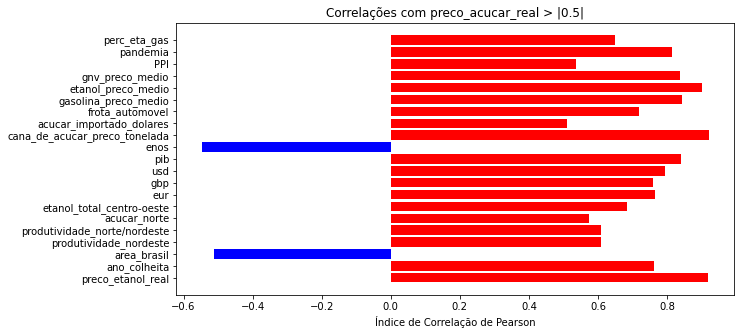

In [60]:
# Plotar gráfico de barras horizontal para preco_acucar_real
plt.figure(figsize=(10, 5))
plt.barh(corr_acucar.index, corr_acucar, color=corr_acucar.apply(lambda x: 'red' if x > 0 else 'blue'))
plt.xlabel('Índice de Correlação de Pearson')
plt.title('Correlações com preco_acucar_real > |0.5|')
plt.show()